In [117]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, optimize
from warnings import warn


# Phase Portrait of Keynesian Cross Model

Taken from [this write up](http://arxiv.org/abs/2303.10835).

In [3]:
def keynesian_cross_model_deriv_G_const(X, t, G=1, b=1, a=1, ):
    """Derivative of the Keynesian cross model with constant G.

    Args:
        X: An iterable with length two. X[0] = I (investment) and
            X[1] = C (consumption). Contains the current state of
            the system
        t: The current time.
        G: Government spending
        b: A parameter of the model 1 < b < inf
        a: A second parameter 1 < a < inf.

    Returns: 
        The derivative of I and C with respect to time.
    """
    I, C = X
    dI = I - a * C
    dC = b * (I - C- G)
    return [dI, dC]

In [23]:
a = 5
G = 1
b = 4
x_p = a * G / (a - 1)
y_p = G / (a - 1) 
keynesian_cross_model_deriv_G_const([x_p, y_p], 0, G=G, b=b, a=a)

[0.0, 0.0]

In [48]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
])
np.all(A == np.reshape([a for a in A.flat], (4,3)))

True

In [82]:
y = 1
x = y or 10
x

1

In [126]:
def phase_portrait(
    F,
    Fparams={},
    scale=1, t0=0,
    npoints=50,
    initial_fixed_point_guess=None
):
    
    f = lambda x: F(x, t0, **Fparams)
    if initial_fixed_point_guess is None:
        initial_fixed_point_guess = np.random.rand(2)
    fixed_point = optimize.root(f, initial_fixed_point_guess)
    if fixed_point.success:
        x_p, y_p = fixed_point.x
        fp_label = f"Fixed point: ({x_p}, {y_p})"
    else:
        warn("No fixed point found. Centering at the origin")
        x_p, y_p = (0, 0)
        fp_label = f"Origin: ({x_p}, {y_p})"

    xs = np.linspace(x_p - scale, x_p + scale, npoints)
    ys = np.linspace(y_p - scale, y_p + scale, npoints)
    X, Y = np.meshgrid(xs, ys)
    derivs = [F(x, 0) for x in zip(X.flat, Y.flat)]
    U = np.reshape([d[0] for d in derivs], (npoints, npoints))
    V = np.reshape([d[1] for d in derivs], (npoints, npoints))
    plt.streamplot(X, Y, U, V)
    plt.scatter(x_p, y_p, label=fp_label, c="k")
    plt.legend(loc=(0, 0))
    plt.show()
    




    

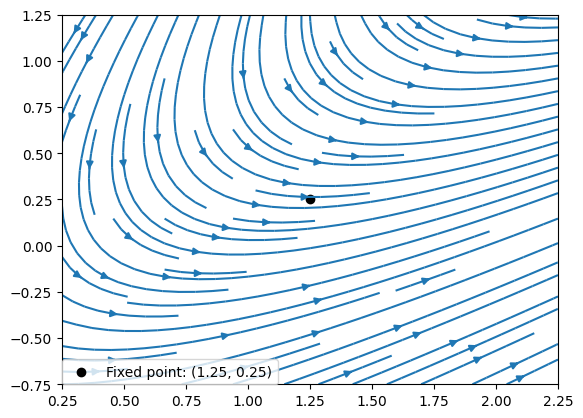

In [127]:
phase_portrait(
    keynesian_cross_model_deriv_G_const,
    Fparams={"G": 1, "b": 4, "a": 5},
    scale=1,
    npoints=30
)

/var/folders/s1/lzq1k08d2572hqgdq0r3j1qm0000gn/T/ipykernel_62377/1381761625.py:17: UserWarning: No fixed point found. Centering at the origin
  warn("No fixed point found. Centering at the origin")


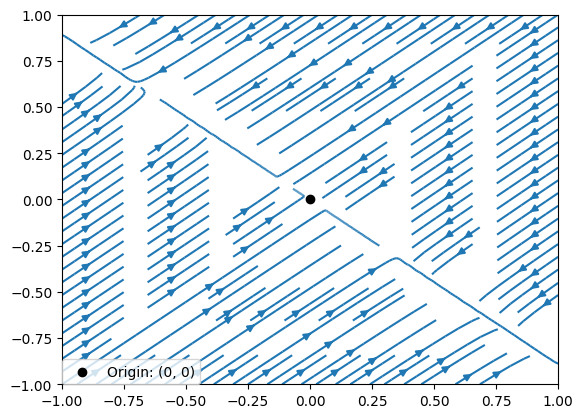

In [128]:
A = 0.5 * np.random.rand(2, 2) - 1
phase_portrait(lambda x, t: A @ x)

/var/folders/s1/lzq1k08d2572hqgdq0r3j1qm0000gn/T/ipykernel_62377/1381761625.py:17: UserWarning: No fixed point found. Centering at the origin
  warn("No fixed point found. Centering at the origin")
/var/folders/s1/lzq1k08d2572hqgdq0r3j1qm0000gn/T/ipykernel_62377/3095390457.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return [0.01 * x * (2 - y), (x -  y) ** -2 / (y - x + 0.1)]


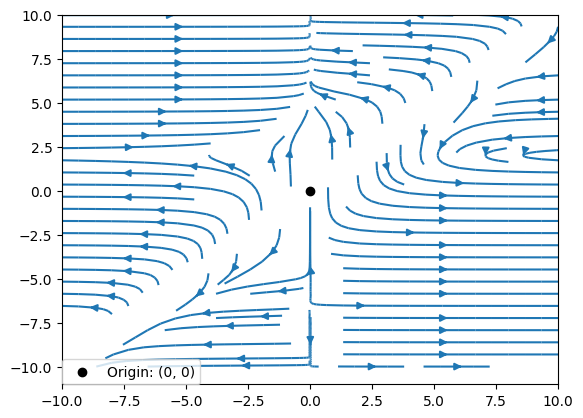

In [131]:
def F1(X, t):
    x, y = X
    return [0.01 * x * (2 - y), (x -  y) ** -2 / (y - x + 0.1)]

X_fp = np.random.rand(2) * 30 - 15
phase_portrait(F1, scale=10, initial_fixed_point_guess=X_fp)